# Introduction

# Libraries

In [29]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [30]:
df = pd.read_csv("E:\customerchurn.csv")

In [31]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [33]:
#how many null valules
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [34]:
#To remove a column from a DataFrame
df.drop("customerID",axis = 1,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [35]:
#object to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [36]:
#fill value by 0
df = df.fillna(0)

In [37]:
#replace value with word no
df.replace({'No phone service':"No", 'No internet service':"No"},inplace=True)


In [38]:
df.replace({'No':0,'Yes':1},inplace = True)

In [39]:
df.replace({'Male':0 ,'Female':1},inplace= True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [41]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [42]:
df = pd.get_dummies(data = df , columns = ["InternetService","Contract","PaymentMethod"], drop_first = True)


In [43]:
X = df.drop("Churn",axis = True)
y = df.Churn

In [44]:
from sklearn.preprocessing import MinMaxScaler


In [45]:
scaler = MinMaxScaler()

In [46]:
X['tenure'] =scaler.fit_transform(X[['tenure']])
X['MonthlyCharges'] =scaler.fit_transform(X[['MonthlyCharges']])
X['TotalCharges'] =scaler.fit_transform(X[['TotalCharges']])

X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,0,0,1,0,...,1,0.115423,0.003437,1,0,0,0,0,1,0
1,0,0,0,0,0.472222,1,0,1,0,1,...,0,0.385075,0.217564,1,0,1,0,0,0,1
2,0,0,0,0,0.027778,1,0,1,1,0,...,1,0.354229,0.012453,1,0,0,0,0,0,1
3,0,0,0,0,0.625000,0,0,1,0,1,...,0,0.239303,0.211951,1,0,1,0,0,0,0
4,1,0,0,0,0.027778,1,0,0,0,0,...,1,0.521891,0.017462,0,1,0,0,0,1,0


In [47]:
#import train test split
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Machine learning algorithms

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
# Create a LogisticRegression instance
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Evaluate the model's accuracy on the test data
accuracy = lr.score(X_test, y_test)

print("Test Accuracy:", accuracy)


Test Accuracy: 0.8218594748048261


In [53]:
y_pred2=lr.predict(X_test)
y_pred2
accuracy_score(y_test,y_pred2)
cr=(classification_report(y_test,y_pred2))
print(cr)


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the Decision Tree classifier
model = DecisionTreeClassifier()

# Define an empty parameter grid
param_grid = {}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict the labels for the test set using the best model
y_pred1 = best_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred1)

print("Test Accuracy:", accuracy)
#print("Best Parameters:", grid_search.best_params_)

Test Accuracy: 0.7139815471965933


In [55]:
y_pred1=grid_search.predict(X_test)
y_pred1
accuracy_score(y_test,y_pred1)
cr=(classification_report(y_test,y_pred1))
print(cr)


              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1036
           1       0.46      0.48      0.47       373

    accuracy                           0.71      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.71      0.72      1409



In [56]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance
rf = RandomForestClassifier()

# Train the model on the training data
rf.fit(X_train, y_train)

# Evaluate the model's accuracy on the test data
accuracy = rf.score(X_test, y_test)

print("Test Accuracy:", accuracy)


Test Accuracy: 0.7877927608232789


In [57]:
y_pred2=rf.predict(X_test)
y_pred2
accuracy_score(y_test,y_pred2)
cr=(classification_report(y_test,y_pred2))
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.46      0.53       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.78      1409



In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
# Create a GradientBoostingClassifier instance
xg = GradientBoostingClassifier()

# Train the model on the training data
xg.fit(X_train, y_train)

# Evaluate the model's accuracy on the test data
accuracy = xg.score(X_test, y_test)

print("Test Accuracy:", accuracy)


Test Accuracy: 0.8147622427253371


In [60]:
y_pred3=xg.predict(X_test)
y_pred3
accuracy_score(y_test,y_pred3)
cr=(classification_report(y_test,y_pred3))
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.54      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



In [61]:
from sklearn.ensemble import AdaBoostClassifier

# Define the AdaBoost classifier
boost = AdaBoostClassifier()

# Fit the model to the training data
boost.fit(X_train, y_train)

# Predict the labels for the test set
y_pred4= boost.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy)


Test Accuracy: 0.8218594748048261


In [62]:
y_pred4=boost.predict(X_test)
y_pred4
accuracy_score(y_test,y_pred4)
cr=(classification_report(y_test,y_pred4))
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [63]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Fit the model to the training data
xgb_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred5 = xgb_classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred5)

print("Test Accuracy:", accuracy)


Test Accuracy: 0.7899219304471257


In [64]:
y_pred5=xgb_classifier.predict(X_test)
y_pred5
accuracy_score(y_test,y_pred5)
cr=(classification_report(y_test,y_pred5))
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.63      0.50      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [65]:
from sklearn.tree import DecisionTreeClassifier
# Define the Decision Tree classifier
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred6 = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred6)

print("Test Accuracy:", accuracy)


Test Accuracy: 0.7175301632363378


In [66]:
y_pred6=model.predict(X_test)
y_pred6
accuracy_score(y_test,y_pred6)
cr=(classification_report(y_test,y_pred6))
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1036
           1       0.47      0.49      0.48       373

    accuracy                           0.72      1409
   macro avg       0.64      0.65      0.64      1409
weighted avg       0.72      0.72      0.72      1409



In [67]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the SVM classifier
model = SVC()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred7= model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred7)

print("Test Accuracy:", accuracy)


Test Accuracy: 0.8105039034776437


In [68]:
y_pred7=model.predict(X_test)
y_pred7
accuracy_score(y_test,y_pred7)
cr=(classification_report(y_test,y_pred7))
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [69]:
from sklearn.neural_network import MLPClassifier

# Define the MLP classifier
model = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred8 = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred8)

print("Test Accuracy:", accuracy)


Test Accuracy: 0.7643718949609652


In [70]:
y_pred8=model.predict(X_test)
y_pred8
accuracy_score(y_test,y_pred8)
cr=(classification_report(y_test,y_pred8))
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1036
           1       0.55      0.61      0.58       373

    accuracy                           0.76      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.77      0.76      0.77      1409



In [71]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred9 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred9)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7679205110007097


In [72]:
y_pred9=model.predict(X_test)
y_pred9
accuracy_score(y_test,y_pred9)
cr=(classification_report(y_test,y_pred9))
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1036
           1       0.54      0.78      0.64       373

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.77      0.78      1409



In [73]:
#checking all models accuracy
final_df = pd.DataFrame({'Models':['lr','gridsearch','rf','xgboost','Adaboost','Xg_classifier','decision_tree','SVC','MLPClassifier','GaussianNB'],
                        'ACC':[accuracy_score(y_test,y_pred),
                              accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6),
                              accuracy_score(y_test,y_pred7),
                              accuracy_score(y_test,y_pred8),
                              accuracy_score(y_test,y_pred9),
]})
final_df

,Models,ACC
0,lr,0.821859
1,gridsearch,0.713982
2,rf,0.787793
3,xgboost,0.814762
4,Adaboost,0.815472
5,Xg_classifier,0.789922
6,decision_tree,0.717530
7,SVC,0.810504
8,MLPClassifier,0.764372
9,GaussianNB,0.767921


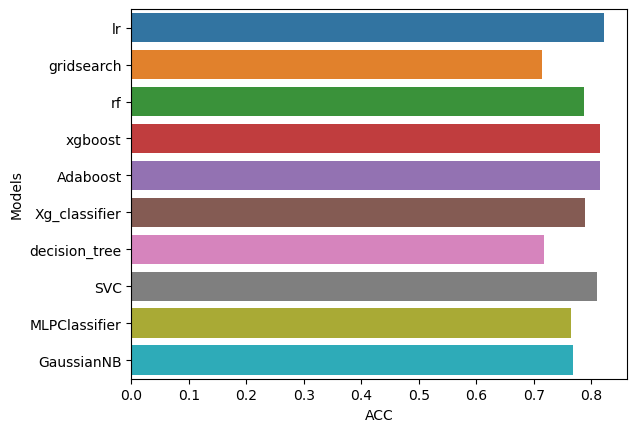

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y='Models', x='ACC', data=final_df, orient='h')
plt.show()
